In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions

IPythonConsole.ipython_useSVG = False
DrawingOptions.includeAtomNumbers = False

def show_mol_grid(mols):
    return MolsToGridImage(
        [x.asRDMol() for x in mols]
        , subImgSize=(250,200)
        , legends=[x.parent_operator for x in mols]
    )

1
10


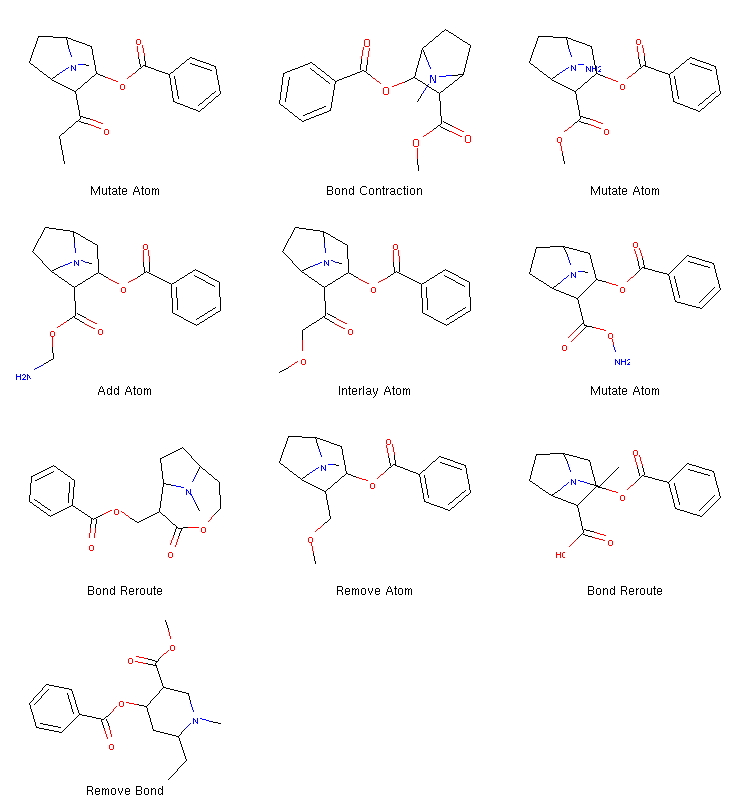

In [2]:
import molpher
from molpher.core.operations import *
from molpher.core import MolpherMol, ExplorationTree as ETree

class MyFilterMorphs(TreeOperation):
    """
    A custom tree operation that accepts
    only the first ten morphs after 
    the list of candidates is sorted.
    """

    def __call__(self):
        """
        This method is called automatically by the tree.
        The tree this operation is being run on is accessible
        from the 'tree' member of the class.
        """

        self.tree.candidates_mask = [
            True if idx < 10 and self.tree.candidates[idx].sascore < 6 
            else False 
            for idx, x in enumerate(self.tree.candidates_mask)
        ]

cocaine = MolpherMol('CN1[CH]2CC[CH]1[CH](C(OC)=O)[CH](OC(C3=CC=CC=C3)=O)C2')
procaine = MolpherMol('O=C(OCCN(CC)CC)c1ccc(N)cc1')
tree = ETree.create(source=cocaine, target=procaine) # create the tree

# list of tree operations, defines one iteration
iteration = [
    GenerateMorphsOper()
    , SortMorphsOper()
    , MyFilterMorphs() # our custom filtering procedure
    , ExtendTreeOper()
    , PruneTreeOper()
]

# apply the operations in the list one by one
for oper in iteration:
    tree.runOperation(oper)

# observe the results
print(tree.generation_count)
print(len(tree.leaves))
show_mol_grid(tree.leaves)

In [3]:
from molpher.core.operations.callbacks import TraverseCallback

class MyCallback(TraverseCallback):
    """
    This callback just prints some information
    about the molecules in the tree.

    """

    def __call__(self, morph):
        """
        Method called on each morph in the tree
        -- starting from the root to leaves.

        """

        if not morph.getParentSMILES():
            print("# Root #")
        else:
            print('# Morph #')
            print('Parent:', morph.getParentSMILES())
        print('SMILES: ', morph.getSMILES())
        print('Descendents: ', morph.getDescendants())

callback = MyCallback() # initialize a callback
traverse = TraverseOper(callback=callback) # attach it to a tree traversal operation
tree.runOperation(traverse) # run the operation

# Root #
SMILES:  COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
Descendents:  ('CCC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C', 'CCC1CC(OC(=O)C2=CC=CC=C2)C(C(=O)OC)CN1C', 'CCN1C2CCC1C(C(=O)O)C(OC(=O)C1=CC=CC=C1)C2', 'CN1C2CCC1C(C(=O)OCN)C(OC(=O)C1=CC=CC=C1)C2', 'CN1C2CCC1C(C(=O)ON)C(OC(=O)C1=CC=CC=C1)C2', 'CN1C2CCOC(=O)C(COC(=O)C3=CC=CC=C3)C1CC2', 'COC(=O)C1C(OC(=O)C2=CC=CC=C2)C2CCC1N2C', 'COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2N', 'COCC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C', 'COCC1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C')
# Morph #
Parent: COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
SMILES:  COCC1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
Descendents:  ()
# Morph #
Parent: COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
SMILES:  COCC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
Descendents:  ()
# Morph #
Parent: COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
SMILES:  COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2N
Descendents:  ()
# Morph #
Parent: COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
SMILES:  COC(=O)C1C(OC(=O)C2=CC=CC=C2)C2CCC1N2C
Descendents:  ()
# 

In [4]:
def process(morph):
    """
    Prints some information
    about the molecules in the tree.

    """

    if not morph.getParentSMILES():
        print("# Root #")
    else:
        print('# Morph #')
        print('Parent:', morph.getParentSMILES())
    print('SMILES: ', morph.getSMILES())
    print('Descendents: ', morph.getDescendants())

tree.traverse(process) # use the traverse method to run the callback function

# Root #
SMILES:  COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
Descendents:  ('CCC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C', 'CCC1CC(OC(=O)C2=CC=CC=C2)C(C(=O)OC)CN1C', 'CCN1C2CCC1C(C(=O)O)C(OC(=O)C1=CC=CC=C1)C2', 'CN1C2CCC1C(C(=O)OCN)C(OC(=O)C1=CC=CC=C1)C2', 'CN1C2CCC1C(C(=O)ON)C(OC(=O)C1=CC=CC=C1)C2', 'CN1C2CCOC(=O)C(COC(=O)C3=CC=CC=C3)C1CC2', 'COC(=O)C1C(OC(=O)C2=CC=CC=C2)C2CCC1N2C', 'COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2N', 'COCC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C', 'COCC1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C')
# Morph #
Parent: COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
SMILES:  COCC1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
Descendents:  ()
# Morph #
Parent: COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
SMILES:  COCC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
Descendents:  ()
# Morph #
Parent: COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
SMILES:  COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2N
Descendents:  ()
# Morph #
Parent: COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C
SMILES:  COC(=O)C1C(OC(=O)C2=CC=CC=C2)C2CCC1N2C
Descendents:  ()
# 

In [5]:
template_file = 'cocaine-procaine-template.xml'

tree = ETree.create(template_file)
print(tree.params)

# apply the tree operations
for oper in iteration:
    tree.runOperation(oper)

print(
    sorted( # grab the new leaves as a list sorted according to their distance from target
    [
        (x.getSMILES(), x.getDistToTarget())
        for x in tree.leaves
    ], key=lambda x : x[1]
    )
)

# save the tree in a snapshot file
tree.save('snapshot.xml')

{'source': 'COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C', 'target': 'CCN(CC)CCOC(=O)C1=CC=C(N)C=C1', 'operators': ('OP_ADD_ATOM', 'OP_REMOVE_ATOM', 'OP_ADD_BOND', 'OP_REMOVE_BOND', 'OP_MUTATE_ATOM', 'OP_INTERLAY_ATOM', 'OP_BOND_REROUTE', 'OP_BOND_CONTRACTION'), 'fingerprint': 'FP_MORGAN', 'similarity': 'SC_TANIMOTO', 'weight_min': 0.0, 'weight_max': 500.0, 'accept_min': 50, 'accept_max': 100, 'far_produce': 80, 'close_produce': 150, 'far_close_threshold': 0.15, 'max_morphs_total': 1500, 'non_producing_survive': 2}
[('COC(=O)C(COC(=O)C1=CC=CC=C1)C1CCC(C)N1C', 0.7619047619047619), ('CCOC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C', 0.7761194029850746), ('COC(=O)C1C(OC(=O)C2=CC=C(O)C=C2)CC2CCC1N2C', 0.7878787878787878), ('CCN1C2CCC1C(C(=O)OC)C(OC(=O)C1=CC=CC=C1)C2', 0.7941176470588236), ('CN1C2CCC1C(C(=O)ON)C(OC(=O)C1=CC=CC=C1)C2', 0.8059701492537313), ('COCC1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C', 0.8059701492537313), ('COC(=O)C1C(OC(=O)C2=CC=CC=C2)C2CCC1N2C', 0.8064516129032258), ('COC(=O)CC(CC1CCCN1C)OC

In [6]:
new_tree = ETree.create('snapshot.xml') # create a new tree from the saved snapshot
print(new_tree.params)
sorted( # grab the leaves in the created tree (these should be the same as those in the original tree)
    [
        (x.getSMILES(), x.getDistToTarget())
        for x in new_tree.leaves
    ], key=lambda x : x[1]
)

{'source': 'COC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C', 'target': 'CCN(CC)CCOC(=O)C1=CC=C(N)C=C1', 'operators': ('OP_ADD_ATOM', 'OP_REMOVE_ATOM', 'OP_ADD_BOND', 'OP_REMOVE_BOND', 'OP_MUTATE_ATOM', 'OP_INTERLAY_ATOM', 'OP_BOND_REROUTE', 'OP_BOND_CONTRACTION'), 'fingerprint': 'FP_MORGAN', 'similarity': 'SC_TANIMOTO', 'weight_min': 0.0, 'weight_max': 500.0, 'accept_min': 50, 'accept_max': 100, 'far_produce': 80, 'close_produce': 150, 'far_close_threshold': 0.15, 'max_morphs_total': 1500, 'non_producing_survive': 2}


[('COC(=O)C(COC(=O)C1=CC=CC=C1)C1CCC(C)N1C', 0.7619047619047619),
 ('CCOC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C', 0.7761194029850746),
 ('COC(=O)C1C(OC(=O)C2=CC=C(O)C=C2)CC2CCC1N2C', 0.7878787878787878),
 ('CCN1C2CCC1C(C(=O)OC)C(OC(=O)C1=CC=CC=C1)C2', 0.7941176470588236),
 ('COCC1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C', 0.8059701492537313),
 ('CN1C2CCC1C(C(=O)ON)C(OC(=O)C1=CC=CC=C1)C2', 0.8059701492537313),
 ('COC(=O)C1C(OC(=O)C2=CC=CC=C2)C2CCC1N2C', 0.8064516129032258),
 ('COC(=O)CC(CC1CCCN1C)OC(=O)C1=CC=CC=C1', 0.8115942028985508),
 ('COC(=O)CC1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C', 0.8115942028985508),
 ('COC(=O)C1CC2CC(CC1OC(=O)C1=CC=CC=C1)N2C', 0.8125)]

Iteration 1
('CCC(=O)C1C(OC(=O)C2=CC=CC=C2)CC2CCC1N2C', 0.7878787878787878)
Iteration 2
('COC(=O)C(C(C)OC(=O)C1=CC=C(N)C=C1)C1CCCN1C', 0.65)
Iteration 3
('CCN(C)C(C)C(C(=O)OC)C(C)OC(=O)C1=CC=C(N)C=C1', 0.5192307692307692)
Iteration 4
('CCCN(CC)CC(C(=O)OC)C(C)OC(=O)C1=CC=C(N)C=C1', 0.46153846153846156)
Iteration 5
('CCCN(CC)CC(COC(=O)C1=CC=C(N)C=C1)C(=O)O', 0.40816326530612246)
Iteration 6
('CCCN(CC)CCOC(=O)CCOC(=O)C1=CC=C(N)C=C1', 0.25)
Iteration 7
('CCN(CC)CCOC(=O)CCOC(=O)C1=CC=C(N)C=C1', 0.15000000000000002)
Iteration 8
('CCN(CC)CCOC(=O)COC(=O)C1=CC=C(N)C=C1', 0.17500000000000004)
Iteration 9
('CCN(CCOC)CCOC(=O)C1=CC=C(N)C=C1', 0.15384615384615385)
Iteration 10
('CCN(CC)CCOOCCOC(=O)C1=CC=C(N)C=C1', 0.15384615384615385)
Iteration 11
('CCN(CC)CCOC(=O)C1=CC=C(N)C=C1', 0.0)


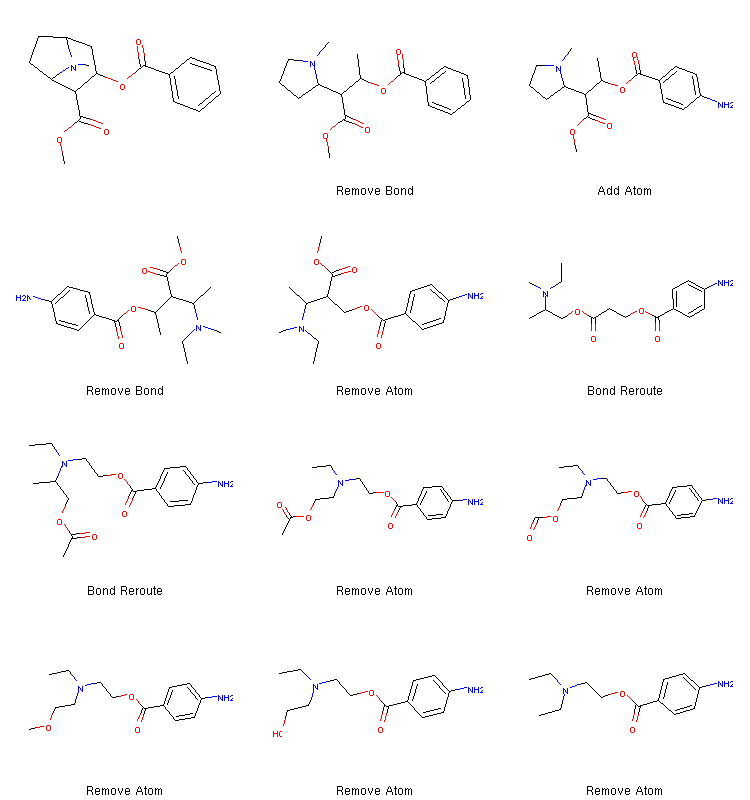

In [7]:
iteration = [
    GenerateMorphsOper()
    , SortMorphsOper()
    , MyFilterMorphs()
    , ExtendTreeOper()
    , PruneTreeOper()
]

tree = ETree.create(source=cocaine, target=procaine)
counter = 0
while not tree.path_found:
    for oper in iteration:
        tree.runOperation(oper)
    counter+=1
    print("Iteration", counter)
    print(
        sorted(
        [
            (x.getSMILES(), x.getDistToTarget())
            for x in tree.leaves
        ], key=lambda x : x[1]
        )[0]
    )

show_mol_grid(tree.fetchPathTo(tree.params['target']))